# 2

## [25 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience applying clustering algorithms and comparing these techniques on various datasets to experience the pros and cons of these approaches when the structure of the data being clustered varies. For this exercise, we'll explore clustering in two dimensions to make the results more tangible, but in practice these approaches can be applied to any number of dimensions.

*Note: For each set of plots across the five datasets, please create subplots within a single figure (for example, when applying DBSCAN - please show the clusters resulting from DBSCAN as a single figure with one subplot for each dataset). This will make comparison easier.*

**(a) Run K-means and choose the number of clusters**. Five datasets are provided for you below and the code to load them below.
- Scatterplot each dataset
- For each dataset run the k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. Here, you can measure dissimilarity using the within-cluster sum-of-squares, which in sklean is known as "inertia" and can be accessed through the `inertia_` attribute of a fit KMeans class instance.
- For each dataset, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When it's not clear, you will have to use your judgment in terms of selecting a reasonable number of clusters for the data. *There are also other metrics you can use to explore to measure the quality of cluster fit (but do not have to for this assignment) including the silhouette score, the Calinski-Harabasz index, and the Davies-Bouldin, to name a few within sklearn alone. However, assessing the quality of fit without "preferred" cluster assignments to compare against (that is, in a truly unsupervised manner) is challenging because measuring cluster fit quality is typically poorly-defined and doesn't generalize across all types of inter- and intra-cluster variation.*
- Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgment for each dataset and your inspection of the dataset.

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

*Note: For these clustering plots in this question, do NOT include legends indicating cluster assignment; instead, just make sure the cluster assignments are clear from the plot (e.g. different colors for each cluster)*



Code is provided below for loading the datasets and for making plots with the clusters as distinct colors

In [1]:
################################
# Load the data
################################
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons

# Create / load the datasets:
n_samples = 1500
X0, _ = make_blobs(n_samples=n_samples, centers=2, n_features=2, random_state=0)
X1, _ = make_blobs(n_samples=n_samples, centers=5, n_features=2, random_state=0)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, cluster_std=1.3)
transformation = [[0.6, -0.6], [-0.2, 0.8]]
X2 = np.dot(X, transformation)
X3, _ = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
X4, _ = make_moons(n_samples=n_samples, noise=.12)

X = [X0, X1, X2, X3, X4]
# The datasets are X[i], where i ranges from 0 to 4

In [2]:
################################
# Code to plot clusters
################################
def plot_cluster(ax, data, cluster_assignments):
    '''Plot two-dimensional data clusters
    
    Parameters
    ----------
    ax : matplotlib axis
        Axis to plot on
    data : list or numpy array of size [N x 2] 
        Clustered data
    cluster_assignments : list or numpy array [N]
        Cluster assignments for each point in data

    '''
    clusters = np.unique(cluster_assignments)
    n_clusters = len(clusters)
    for ca in clusters:
        kwargs = {}
        if ca == -1:
            # if samples are not assigned to a cluster (have a cluster assignment of -1, color them gray)
            kwargs = {'color':'gray'}
            n_clusters = n_clusters - 1
        ax.scatter(data[cluster_assignments==ca, 0], data[cluster_assignments==ca, 1],s=5,alpha=0.5, **kwargs)
        ax.set_xlabel('feature 1')
        ax.set_ylabel('feature 2')
        ax.set_title(f'No. Clusters = {n_clusters}')
        ax.axis('equal')

**ANSWER**

**(a) Run K-means and choose the number of clusters**.

    (i) Scatterplot each dataset


In [10]:
# plot the training data by class
def plot_scatter(axis, X, title):
    '''
    Plot a scatter plot of the data X
    Parameters:
    axis: a matplotlib axis
    X: a pandas dataframe of size [N x 2]
    title: a string for the title of the plot
    Return:
    None
    '''
    axis.scatter(X[:, 0], X[:, 1], edgecolors='black', s=20, c='dodgerblue')
    axis.set_xlabel('$x_1$', fontsize=12) 
    axis.set_ylabel('$x_2$', fontsize=12)
    axis.set_title(title, fontsize=14) 

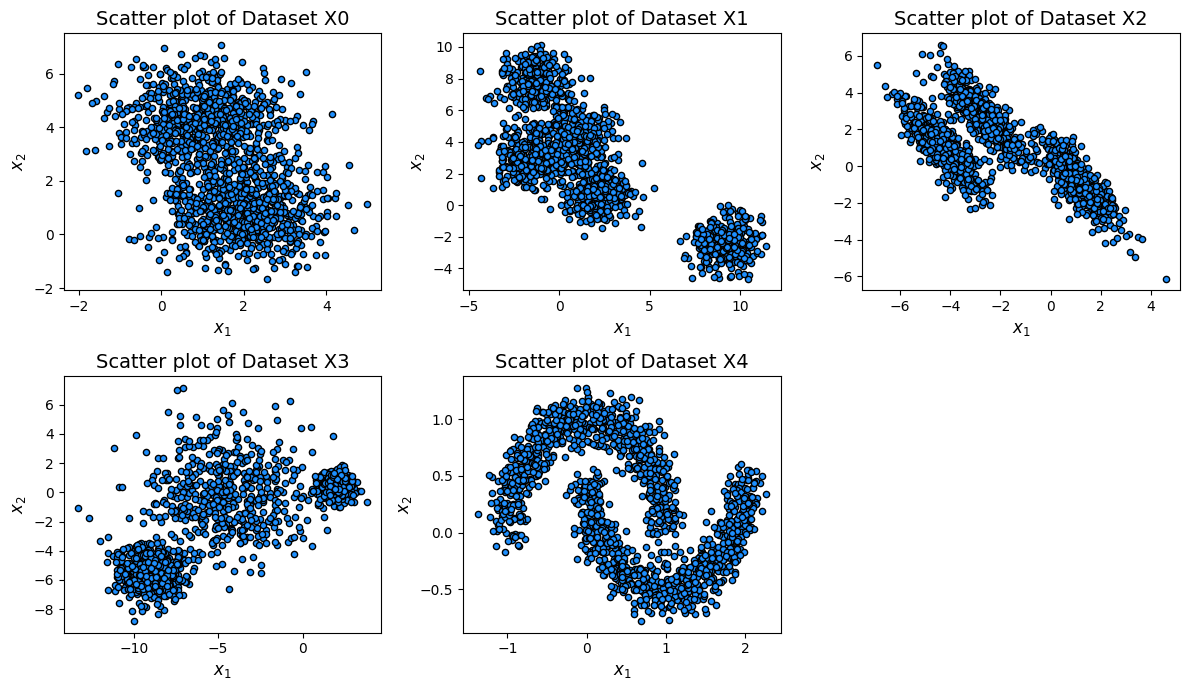

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
for i in range(2):
    for j in range(3):
        if i*3+j == 5:
            break
        plot_scatter(axes[i, j], X[i*3+j], title="Scatter plot of Dataset X{}".format(i*3+j))
        axes[1, 2].axis('off')
        plt.tight_layout()

    (ii) Run k-means algorithm for values of k ranging from 1 to 10 and for each plot the "elbow curve".

In [12]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [41]:
def plot_elbow(axis, X, title):
    '''
    Plot the elbow curve for KMeans clustering
    Parameters
    axis : matplotlib axis, Axis to plot on
    X : list or numpy array of size [N x 2], Data to cluster
    title : string, Title of the plot
    '''
    wscc = []
    for i in range(10):
        kmeans = KMeans(n_clusters=i+1, random_state=42).fit(X)
        wscc.append(kmeans.inertia_)

    # Plot the elbow curve
    axis.plot(range(1, 11), wscc, marker='o', linestyle='-', color='darkblue')
    axis.set_xticks(range(1, 11))
    axis.set_xlabel('Number of clusters', fontsize=12)
    axis.set_ylabel('Within-cluster sum of squares', fontsize=12)
    axis.set_title(title, fontsize=14)

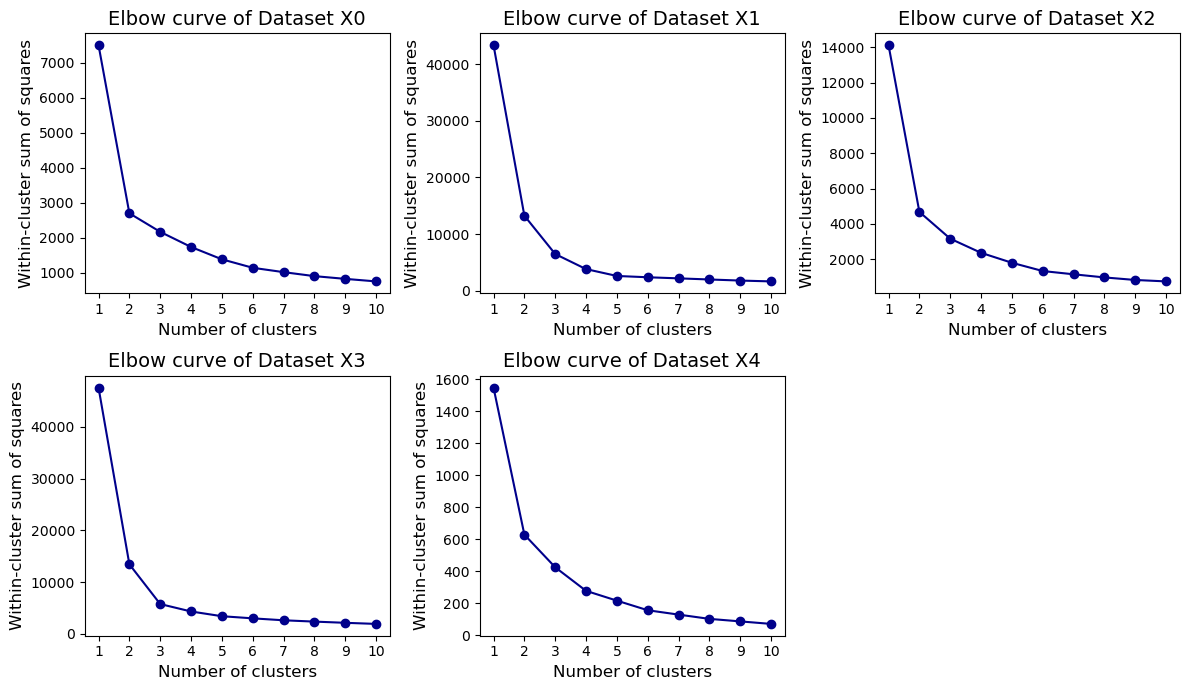

In [45]:
# plot clustered data
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
for i in range(2):
    for j in range(3):
        if i*3+j == 5:
            break
        plot_elbow(axes[i, j], X[i*3+j], title="Elbow curve of Dataset X{}".format(i*3+j))
        axes[1, 2].axis('off')
        plt.tight_layout()

    (iii) For each dataset, where is the elbow in the curve of within-cluster sum-of-squares and why? Is the elbow always clearly visible? When it's not clear, you will have to use your judgment in terms of selecting a reasonable number of clusters for the data.

- For Dataset **X0**, the best **$k$ is 2** from the elbow curve because the decrease in WCSS begins to level off after $k=2$
- For Dataset **X1**, the best $k$ is not very clear from the elbow curve, but I choose **$k=4$** using my judgement because adding more clusters to the model no longer leads to significant improvements in the clustering quality after $k=4$
- For Dataset **X2**, the best $k$ is not very clear from the elbow curve, but I choose **$k=3$** using my judgement. After the number of clusters reaches four ($k=3$), further increases in the number of clusters do not result in significant decrease in WCSS.
- For Dataset **X3**, the best **$k$ is 3** from the elbow curve since the level of decrease in WCSS is much less after $k=3$
- For Dataset **X4**, the best $k$ is not very clear from the elbow curve, but I choose **$k=2$** using my judgement. The decrease of WCSS begins to slow down after $k=2$.

    (iv) Plot your clustered data (different color for each cluster assignment) for your best $k$-means fit determined from both the elbow curve and your judgment for each dataset and your inspection of the dataset.

In [13]:
def pred_y(X, n_clusters):
    '''
    Parameters
    X : list or numpy array of size [N x 2]
    n_clusters : int, Number of clusters to use for KMeans clustering
        
    Returns
    y_pred : list or numpy array [N]'''
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    return kmeans.predict(X)

In [14]:
# store cluster assignments for each dataset to a list
l_cluster_assginments = []
l_cluster_assginments.append(pred_y(X[0], 2))
l_cluster_assginments.append(pred_y(X[1], 4))
l_cluster_assginments.append(pred_y(X[2], 3))
l_cluster_assginments.append(pred_y(X[3], 3))
l_cluster_assginments.append(pred_y(X[4], 2))

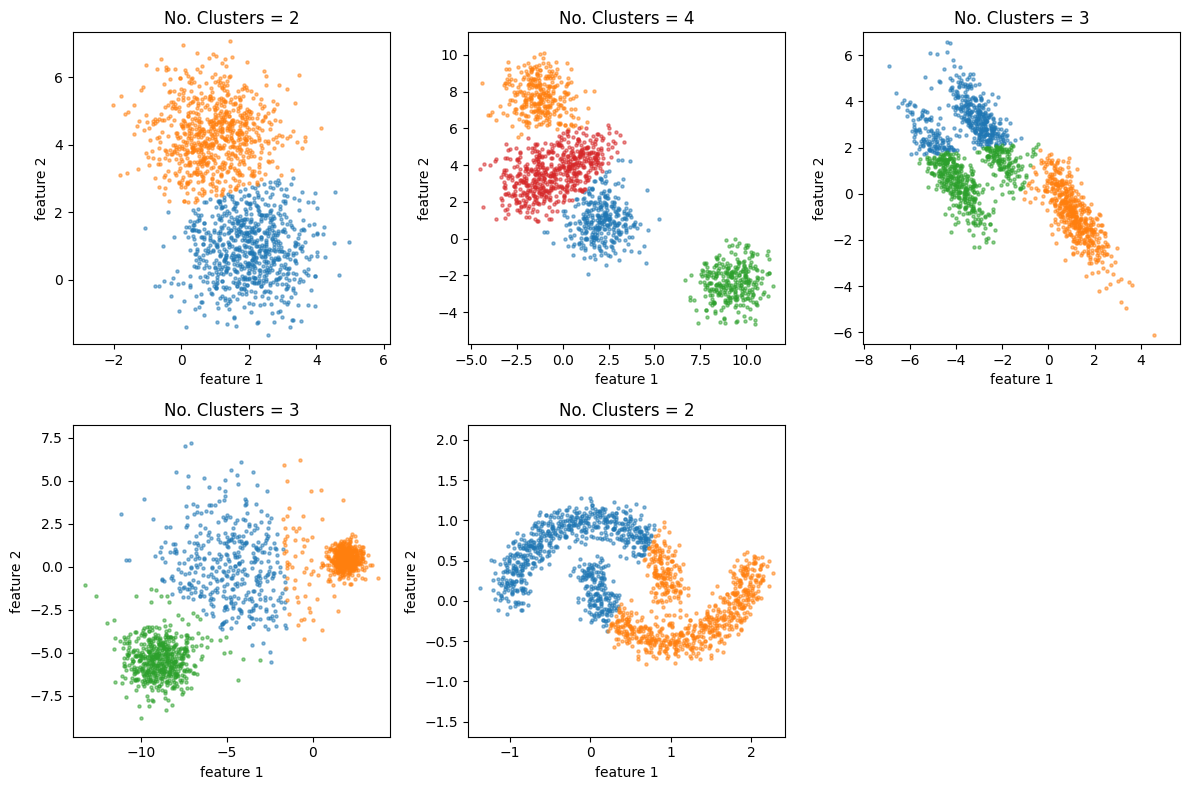

In [15]:
# plot clustered data
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i in range(2):
    for j in range(3):
        if i*3+j == 5:
            break
        plot_cluster(axes[i,j], X[i*3+j], cluster_assignments=l_cluster_assginments[i*3+j])
        axes[1, 2].axis('off')
        plt.tight_layout()

After choosing the best $k$ from both the elbow curve and my judgement, KMeans clustering performs well on dataset $X0$, $X1$, $X3$, but it struggles with correctly clustering datasets $X2$ and $X4$, leading to some confusion.

**(b) Apply DBSCAN**. Vary the `eps` and `min_samples` parameters to get as close as you can to having the same number of clusters as your choices with K-means. In this case, the black points are points that were not assigned to clusters.

In [17]:
from sklearn.cluster import DBSCAN

Dataset $X0$

In [24]:
def dbscan_learning_curve(eps_range, min_samples_range, X):
    '''
    Parameters
    eps_range : list, Range of eps to use
    min_samples_range : list, Range of min_samples to use
    X: dataset to fit
    '''
    l_n_clusters = []
    l_n_noise = []
    for eps in eps_range:
        for min_samples in min_samples_range:
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            labels = db.labels_
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise_ = list(labels).count(-1)
            l_n_clusters.append(n_clusters_)
            l_n_noise.append(n_noise_)
            print('eps = {}, min_samples = {}'.format(eps, min_samples))
            print("Estimated number of clusters: %d" % n_clusters_)
            print("Estimated number of noise points: %d" % n_noise_)

In [25]:
dbscan_learning_curve(np.linspace(0.01, 1, 10), range(1, 80, 20), X[0])

eps = 0.01, min_samples = 1
Estimated number of clusters: 1482
Estimated number of noise points: 0
eps = 0.01, min_samples = 21
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 41
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 61
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.12, min_samples = 1
Estimated number of clusters: 388
Estimated number of noise points: 0
eps = 0.12, min_samples = 21
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.12, min_samples = 41
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.12, min_samples = 61
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.23, min_samples = 1
Estimated number of clusters: 79
Estimated number of noise points: 0
eps = 0.23, min_samples = 21
Estimated number of clusters: 5
Estimated number of noise points: 1072
eps = 

When eps = 0.56, min_samples = 61, estimated number of clusters is 2, and the estimated number of noise points is the smallest (304).

Dataset $X1$

In [29]:
dbscan_learning_curve(np.linspace(0.01, 2, 10), range(1, 80, 10), X[1])

eps = 0.01, min_samples = 1
Estimated number of clusters: 1492
Estimated number of noise points: 0
eps = 0.01, min_samples = 11
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 21
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 31
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 41
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 51
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 61
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 71
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.23111111111111113, min_samples = 1
Estimated number of clusters: 217
Estimated number of noise points: 0
eps = 0.23111111111111113, min_samples = 11
Estimated number of clusters: 18
Estimated n

When eps = 0.89, min_samples = 71, estimated number of clusters is 4, and the estimated number of noise points is 212.

Dataset $X2$

In [50]:
dbscan_learning_curve(np.linspace(0.01, 1, 10), range(1, 40, 10), X[2])

eps = 0.01, min_samples = 1
Estimated number of clusters: 1479
Estimated number of noise points: 0
eps = 0.01, min_samples = 11
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 21
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 31
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.12, min_samples = 1
Estimated number of clusters: 378
Estimated number of noise points: 0
eps = 0.12, min_samples = 11
Estimated number of clusters: 7
Estimated number of noise points: 1413
eps = 0.12, min_samples = 21
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.12, min_samples = 31
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.23, min_samples = 1
Estimated number of clusters: 92
Estimated number of noise points: 0
eps = 0.23, min_samples = 11
Estimated number of clusters: 6
Estimated number of noise points: 367
eps = 0

When eps = 0.56, min_samples = 31, estimated number of clusters is 3, and the estimated number of noise points is 87.

Dataset $X3$

In [84]:
dbscan_learning_curve(np.linspace(0.01, 1, 10), range(1, 40, 10), X[3])

eps = 0.01, min_samples = 1
Estimated number of clusters: 1480
Estimated number of noise points: 0
eps = 0.01, min_samples = 11
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 21
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 31
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.12, min_samples = 1
Estimated number of clusters: 708
Estimated number of noise points: 0
eps = 0.12, min_samples = 11
Estimated number of clusters: 3
Estimated number of noise points: 1246
eps = 0.12, min_samples = 21
Estimated number of clusters: 1
Estimated number of noise points: 1421
eps = 0.12, min_samples = 31
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.23, min_samples = 1
Estimated number of clusters: 351
Estimated number of noise points: 0
eps = 0.23, min_samples = 11
Estimated number of clusters: 5
Estimated number of noise points: 821
eps = 

When eps = 0.89, min_samples = 11, estimated number of clusters is 3, and the estimated number of noise points is 64.

Dataset $X4$

In [88]:
dbscan_learning_curve(np.linspace(0.01, 1, 10), range(1, 40, 5), X[4])

eps = 0.01, min_samples = 1
Estimated number of clusters: 1381
Estimated number of noise points: 0
eps = 0.01, min_samples = 6
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 11
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 16
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 21
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 26
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 31
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.01, min_samples = 36
Estimated number of clusters: 0
Estimated number of noise points: 1500
eps = 0.12, min_samples = 1
Estimated number of clusters: 7
Estimated number of noise points: 0
eps = 0.12, min_samples = 6
Estimated number of clusters: 1
Estimated number of noise points: 14
eps = 0.1

When eps = 0.12, min_samples = 11, estimated number of clusters is 3, and the estimated number of noise points is 30.

In [91]:
# final DBSCAN clustering for each dataset
db_x0 = DBSCAN(eps=0.56, min_samples=61).fit(X[0])
clusters_x0 = db_x0.fit_predict(X[0])

db_x1 = DBSCAN(eps=0.89, min_samples=71).fit(X[1])
clusters_x1 = db_x1.fit_predict(X[1])

db_x2 = DBSCAN(eps=0.56, min_samples=31).fit(X[2])
clusters_x2 = db_x2.fit_predict(X[2])

db_x3 = DBSCAN(eps=0.89, min_samples=11).fit(X[3])
clusters_x3 = db_x3.fit_predict(X[3])

db_x4 = DBSCAN(eps=0.12, min_samples=11).fit(X[4])
clusters_x4 = db_x4.fit_predict(X[4])

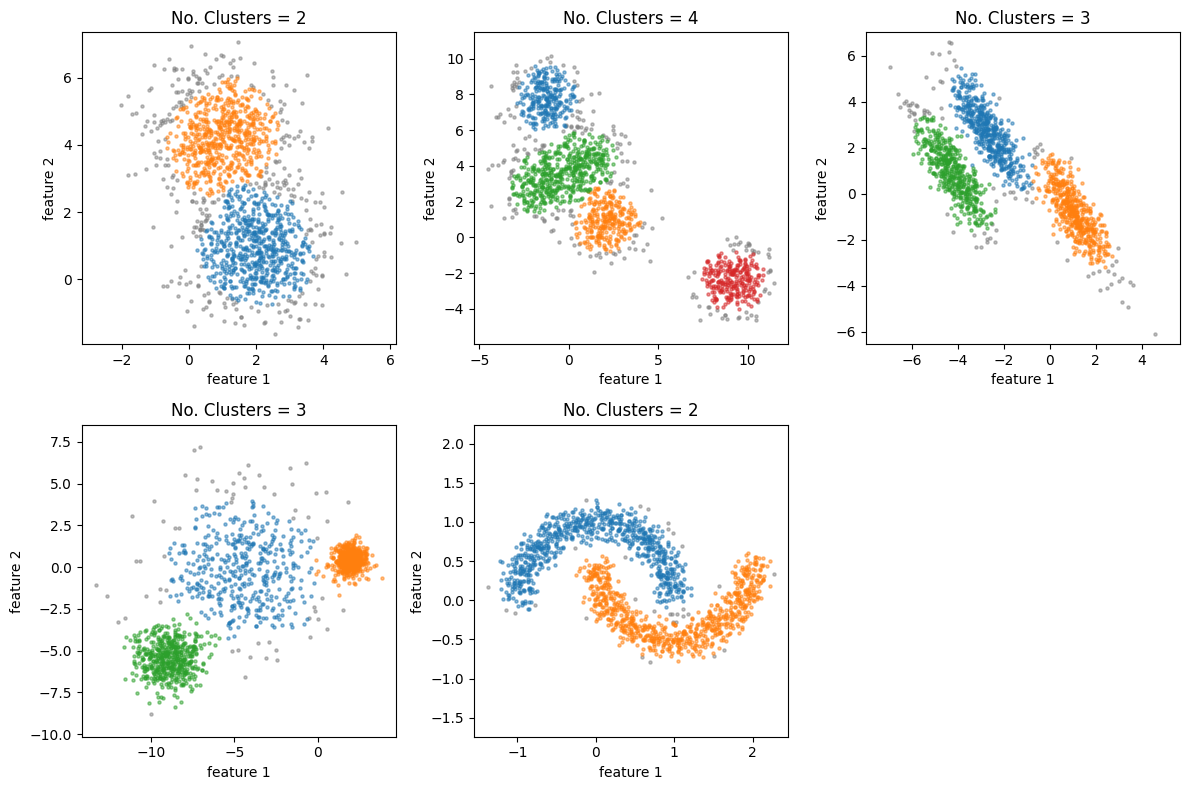

In [92]:
# plot the clustering results
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
plot_cluster(axes[0,0], X[0], cluster_assignments=clusters_x0)
plot_cluster(axes[0,1], X[1], cluster_assignments=clusters_x1)
plot_cluster(axes[0,2], X[2], cluster_assignments=clusters_x2)
plot_cluster(axes[1,0], X[3], cluster_assignments=clusters_x3)
plot_cluster(axes[1,1], X[4], cluster_assignments=clusters_x4)
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

**(c) Apply Spectral Clustering**. Select the same number of clusters as selected by k-means.

In [93]:
from sklearn.cluster import SpectralClustering

In [94]:
def pred_y(X, n_clusters):
    '''
    Parameters
    X : list or numpy array of size [N x 2]
    n_clusters : int, Number of clusters to use for KMeans clustering
        
    Returns
    y_pred : list or numpy array [N]'''
    Sclustering = SpectralClustering(n_clusters=n_clusters, random_state=42).fit(X)
    return Sclustering.labels_

In [95]:
# store cluster assignments for each dataset to a list
l_cluster_assginments = []
l_cluster_assginments.append(pred_y(X[0], 2))
l_cluster_assginments.append(pred_y(X[1], 4))
l_cluster_assginments.append(pred_y(X[2], 3))
l_cluster_assginments.append(pred_y(X[3], 3))
l_cluster_assginments.append(pred_y(X[4], 2))

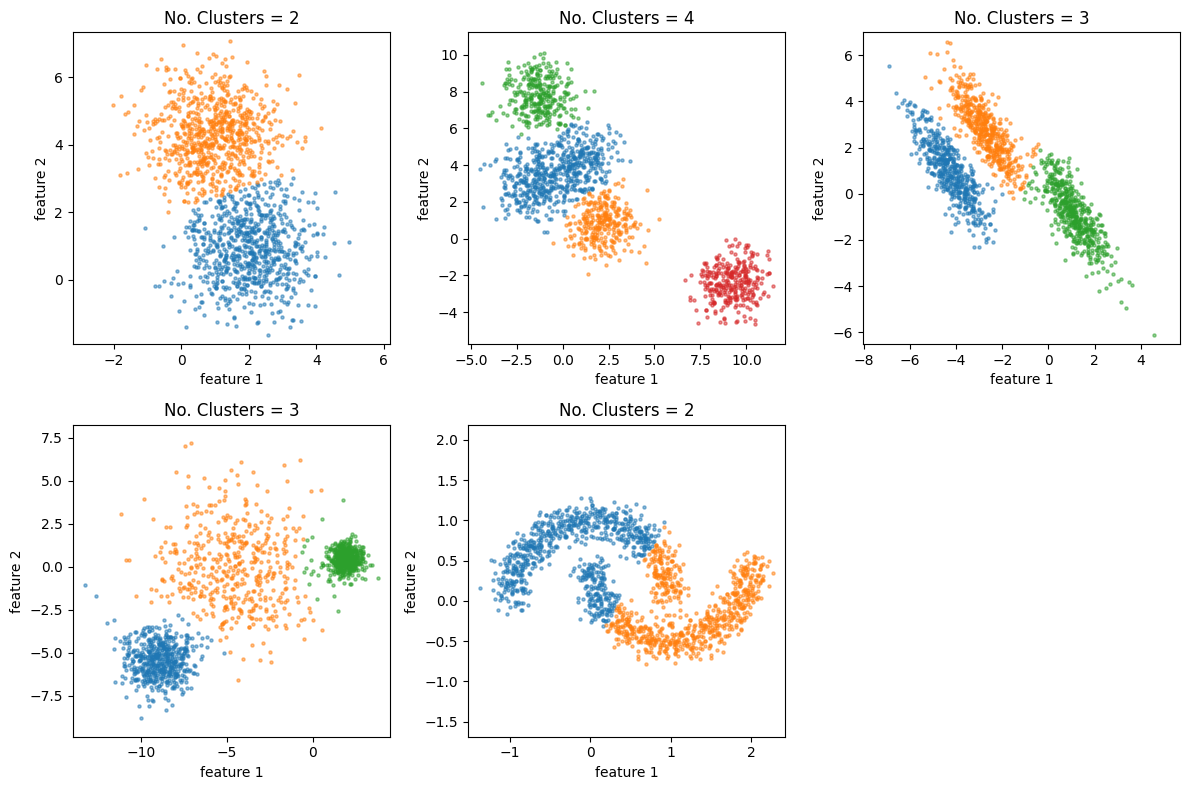

In [96]:
# plot clustered data
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i in range(2):
    for j in range(3):
        if i*3+j == 5:
            break
        plot_cluster(axes[i,j], X[i*3+j], cluster_assignments=l_cluster_assginments[i*3+j])
        axes[1, 2].axis('off')
        plt.tight_layout()

**(d) Comment on the strengths and weaknesses of each approach**. In particular, mention: 
- Which technique worked "best" and "worst" (as defined by matching how human intuition would cluster the data) on each dataset?
- How much effort was required to get good clustering for each method (how much parameter tuning needed to be done)?

Comparing with KMeans, DBSCAN, and spectral clustering, DBSCAN worked best on the five datasets while KMeans worked the worst. DBSCAN achieved good performance on all datasets, spectral clustering had some trouble clustering dataset $X4$, and KMeans struggles on both dataset $X2$ and dataset $X4$. 
- **KMeans**:
    - Strengths:
        1. It converges very quickly.
        2. It excels with clusters of equal variance.
        3. Ituitive, easy to understand and implement.
    - Weaknesses:
        1. It is sensitive to initialization of means.
        2. It requires specifying number of clusters.
        3. It struggles in situations with variation in cluster variance and correlation between features. It also struggles when there are nonlinear boundaries between clusters. Worked 'worst' on the five datasets.

- **DBSCAN**:
    - Strengths:
        1. No need to pre-define number of clusters.
        2. Can find arbitrarily shaped clusters. Worked 'best' on the five datasets.
        3. It is robust to outliers.
    - Weaknesses:
        1. It requires the most effort to train. Need to perform hyperparameter tuning (eps and min_samples).
        2. It cannot handle significant variation in cluster density.
        3. It is not entirely deterministic.
    
- **Spectral clustering**:
    - Strengths:
        1. It can capture the global structure of the data and often produces good clustering results
        2. No need to perform hyperparameter tuning, easy to implement
        3. It is robust to noise and outliers.
    - Weaknesses:
        1. It requires specifying number of clusters.
        2. It can be computationally expensive for large datasets

# 3

## [25 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset (code provided to do this below). Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). 
- What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? 
- Briefly comment on how this may impact how well-clustered the data are. 
*You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Briefy compare/contrast the performance of these two techniques. 
- Which seemed to cluster the data best and why?
- Notice that while t-SNE has a `fit` method and a `fit_transform` method, these methods are actually identical, and there is no `transform` method. Why is this? What implications does this imply for using this method?

*Note: Remember that you typically will not have labels available in most problems.*

Code is provided for loading the data below.

In [97]:
################################
# Load the data
################################
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# load dataset
digits = datasets.load_digits()
n_sample = digits.target.shape[0]
n_feature = digits.images.shape[1] * digits.images.shape[2]
X_digits = np.zeros((n_sample, n_feature))
for i in range(n_sample):
    X_digits[i, :] = digits.images[i, :, :].flatten()
y_digits = digits.target

**ANSWER**

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

In [99]:
# standardize the data
from sklearn.preprocessing import StandardScaler
X_digits_std = StandardScaler().fit_transform(X_digits)

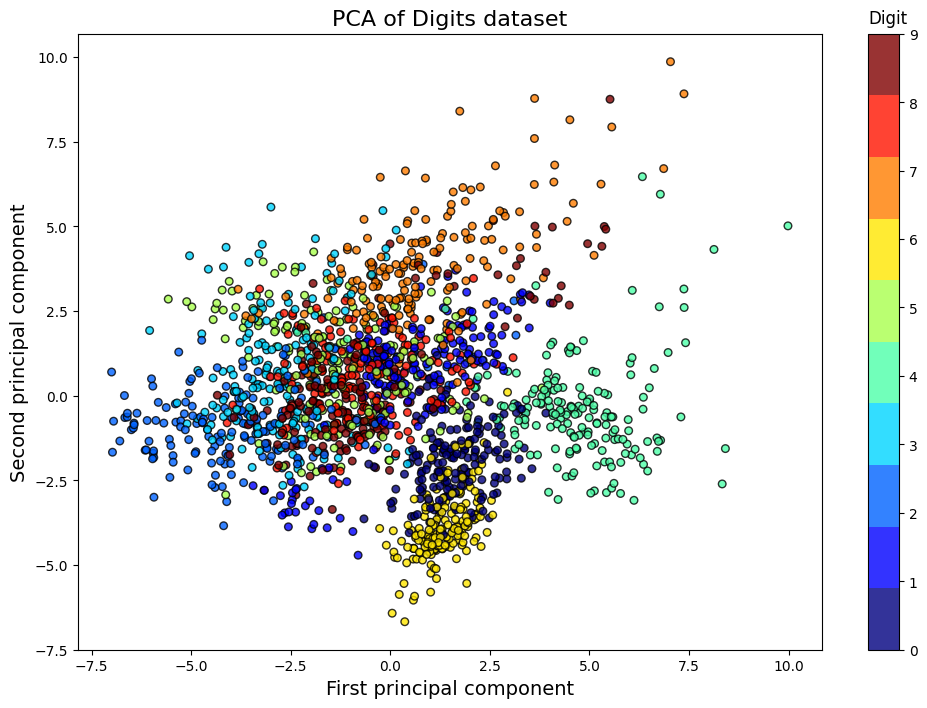

In [100]:
# fit PCA and get transformed X
pca = PCA(n_components=2, random_state=42).fit(X_digits_std)
X_pca = pca.transform(X_digits_std)

# plotting
plt.figure(figsize=(12,8), dpi=100)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_digits, \
    cmap=plt.cm.get_cmap('jet', 10), s=30, alpha=0.8, edgecolors='black')
plt.colorbar(ticks=range(10))
plt.xlabel('First principal component', fontsize=14)
plt.ylabel('Second principal component', fontsize=14)
plt.text(12, 11, 'Digit', fontsize=12)
plt.title('PCA of Digits dataset', fontsize=16)
plt.show()

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). 
- What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? 
- Briefly comment on how this may impact how well-clustered the data are. 
*You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*



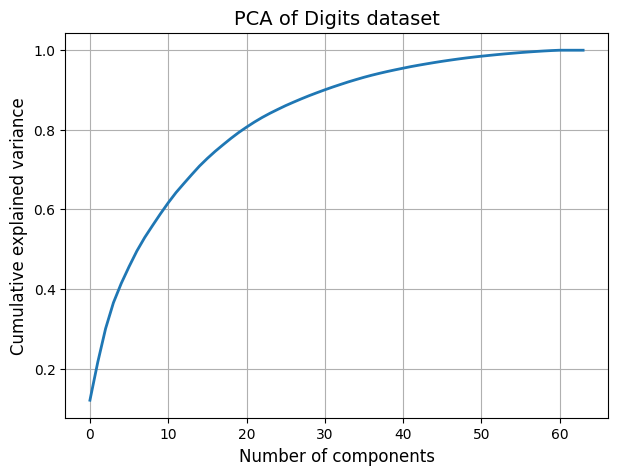

In [101]:
pca = PCA().fit(X_digits_std)
plt.figure(figsize=(7, 5), dpi=100)
plt.grid('on')  
plt.plot(np.cumsum(pca.explained_variance_ratio_), linewidth=2)
plt.xlabel('Number of components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)
plt.title('PCA of Digits dataset', fontsize=14)
plt.show()

In [102]:
pca_two = PCA(n_components=2, random_state=42).fit(X_digits_std)
var_exp_1, var_exp_2 = pca_two.explained_variance_ratio_
print(f"Fraction of variance that is UNEXPLAINED by the first two principal components: {(1 - var_exp_1 - var_exp_2)*100:.2f}%")

Fraction of variance that is UNEXPLAINED by the first two principal components: 78.41%


From the plot of cumulative fraction of variance explained, we can see that as the number of components increase, more variance is explained. The fraction of variance that is unexplained by the first two components reach 78.41%, which means that the first two principal components may not be sufficient to capture all the important characteristics of the data. This can result in clusters that are less well-separated and less distinct, as the remaining variability may be contributing to overlaps between the clusters

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE using the `scikit-learn` implementation to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

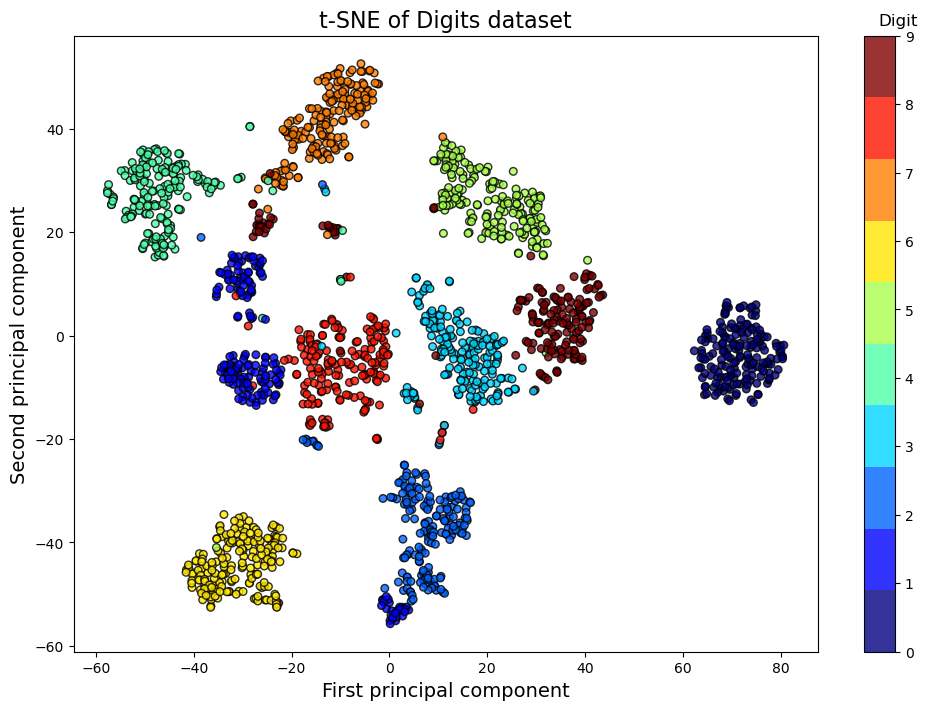

In [151]:
X_digits_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_digits_std)

# plotting
plt.figure(figsize=(12,8), dpi=100)
plt.scatter(X_digits_tsne[:, 0], X_digits_tsne[:, 1], c=y_digits, cmap=plt.cm.get_cmap('jet', 10), s=30, alpha=0.8, edgecolors='black')
plt.colorbar(ticks=range(10))
plt.xlabel('First principal component', fontsize=14)
plt.ylabel('Second principal component', fontsize=14)
plt.text(100, 60, 'Digit', fontsize=12)
plt.title('t-SNE of Digits dataset', fontsize=16)
plt.show()

**(d)** Briefy compare/contrast the performance of these two techniques. 
- Which seemed to cluster the data best and why?
- Notice that while t-SNE has a `fit` method and a `fit_transform` method, these methods are actually identical, and there is no `transform` method. Why is this? What implications does this imply for using this method?

From the two-dimensional plots, it seems that t-SNE performs better than PCA in clustering the data. There is less overlapping between clusters after t-SNE dimentionality reduction. 
This is becaue t-SNE uses a probabilistic approach to embed the data in a lower-dimensional space while preserving the local structure of the data. Therefore, it is particularly well-suited for visualizing complex relationships between variables and clusters that may be difficult to separate in high-dimensional space. On the other hand, PCA is a linear method, so it may struggle with non-linear relationships between the variables.

The reason why t-SNE has *fit* and *fit_transform* method without *transform* method is due to the fact that when mapping high-dimensional data to a lower-dimensional space, the mapping is not a linear transformation, and the reduced representation of the data cannot be computed directly from a pre-defined transformation matrix.\
The t-SNE algorithm uses the *fit* method to start an iterative optimization process that updates the locations of the data points until it reaches a minimum. The *fit_transform* method performs the same optimization process as *fit*, but it also returns the reduced representation of the data in a lower-dimensional space. Since there is no pre-defined transformation matrix for t-SNE, it doesn't make sense to have a separate *transform* method to apply a pre-defined transformation to new data points.